In [1]:
import pandas as pd

data = pd.read_csv('Data/SMSSpamCollection.tsv', sep='\t', header=None)
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [2]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(' ')), 3) * 100

data['body_len'] = data['body_text'].apply(lambda x:len(x) - x.count(' '))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

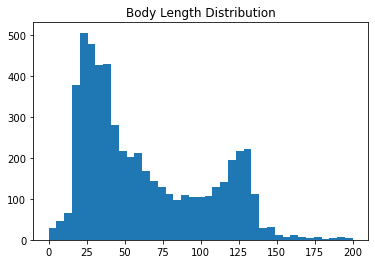

In [4]:
bins = np.linspace(0, 200, 40)

plt.hist(data['body_len'], bins)
plt.title('Body Length Distribution')
plt.show()

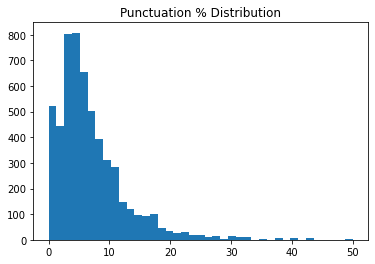

In [5]:
bins = np.linspace(0, 50, 40)

plt.hist(data['punct%'], bins)
plt.title('Punctuation % Distribution')
plt.show()

### Box-Cox Transformation

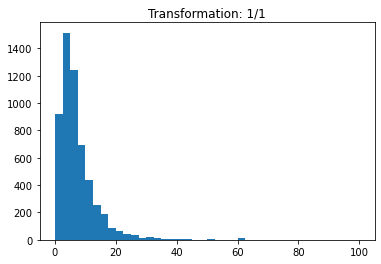

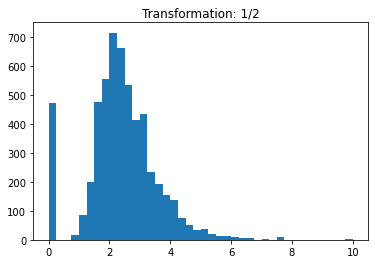

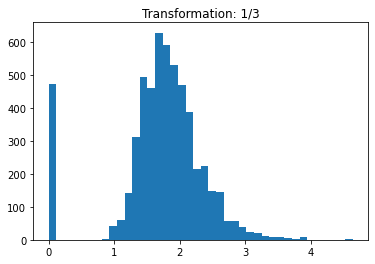

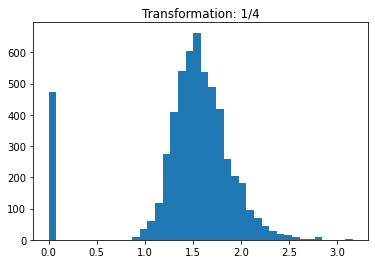

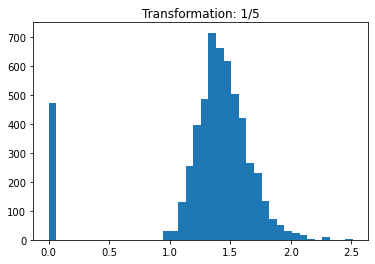

In [6]:
for i in [1, 2, 3, 4, 5]:
    plt.hist((data['punct%'])**(1/i), bins=40)
    plt.title(f'Transformation: 1/{str(i)}')
    plt.show()